In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = "Online_Transaction_Fraud_detection.csv"
df = pd.read_csv(file_path)

print(df.head())

   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   283   CASH_IN  210329.84  C1159819632     3778062.79      3988392.64   
1   132  CASH_OUT  215489.19  C1372369468       21518.00            0.00   
2   355     DEBIT    4431.05  C1059822709       20674.00        16242.95   
3   135  CASH_OUT  214026.20  C1464960643       46909.73            0.00   
4   381  CASH_OUT    8858.45   C831134427           0.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  C1218876138      1519266.60      1308936.76      0.0             0.0  
1   C467105520      6345756.55      6794954.89      0.0             0.0  
2    C76588246        80876.56        85307.61      0.0             0.0  
3  C1059379810     13467450.36     13681476.56      0.0             0.0  
4   C579876929      1667180.58      1676039.03      0.0             0.0  


In [ ]:
print(df.shape)

(28322, 11)


In [ ]:
print( df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28322 non-null  int64  
 1   type            28322 non-null  object 
 2   amount          28322 non-null  float64
 3   nameOrig        28322 non-null  object 
 4   oldbalanceOrg   28322 non-null  float64
 5   newbalanceOrig  28322 non-null  float64
 6   nameDest        28322 non-null  object 
 7   oldbalanceDest  28321 non-null  float64
 8   newbalanceDest  28321 non-null  float64
 9   isFraud         28321 non-null  float64
 10  isFlaggedFraud  28321 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.4+ MB
None


In [ ]:
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  28322.000000  2.832200e+04   2.832200e+04    2.832200e+04   
mean     243.301038  1.743632e+05   8.329971e+05    8.542363e+05   
std      142.125458  5.202983e+05   2.889339e+06    2.924318e+06   
min        1.000000  1.700000e-01   0.000000e+00    0.000000e+00   
25%      155.000000  1.315187e+04   0.000000e+00    0.000000e+00   
50%      236.000000  7.351690e+04   1.459957e+04    0.000000e+00   
75%      334.000000  2.050081e+05   1.079165e+05    1.476758e+05   
max      718.000000  3.974146e+07   3.192658e+07    3.200459e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    2.832100e+04    2.832100e+04  28321.000000         28321.0  
mean     1.076049e+06    1.196460e+06      0.001201             0.0  
std      3.227784e+06    3.463728e+06      0.034628             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    0.000000e+00

In [ ]:
print(df.head())

   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   283   CASH_IN  210329.84  C1159819632     3778062.79      3988392.64   
1   132  CASH_OUT  215489.19  C1372369468       21518.00            0.00   
2   355     DEBIT    4431.05  C1059822709       20674.00        16242.95   
3   135  CASH_OUT  214026.20  C1464960643       46909.73            0.00   
4   381  CASH_OUT    8858.45   C831134427           0.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  C1218876138      1519266.60      1308936.76      0.0             0.0  
1   C467105520      6345756.55      6794954.89      0.0             0.0  
2    C76588246        80876.56        85307.61      0.0             0.0  
3  C1059379810     13467450.36     13681476.56      0.0             0.0  
4   C579876929      1667180.58      1676039.03      0.0             0.0  


In [ ]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [ ]:
df.columns = df.columns.str.strip()  # Removes spaces before/after column names

In [ ]:
x = df['step'].value_counts().nunique()
print("The number of different steps involved in transactions is:", x)

The number of different steps involved in transactions is: 150


In [ ]:
print(df['isFraud'].value_counts(), "\n")

isFraud
0.0    28287
1.0       34
Name: count, dtype: int64 



In [ ]:
# Check unique values in 'isFlaggedFraud'
print(df['isFlaggedFraud'].value_counts())


isFlaggedFraud
0.0    28321
Name: count, dtype: int64


In [ ]:
# Drop the column if it has too few non-zero values
df = df.drop('isFlaggedFraud', axis=1)

In [ ]:
print(df.type.value_counts())

type
CASH_OUT    9963
PAYMENT     9643
CASH_IN     6218
TRANSFER    2313
DEBIT        185
Name: count, dtype: int64


<ipython-input-163-21e4e6f4ee27>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["green", "red"])


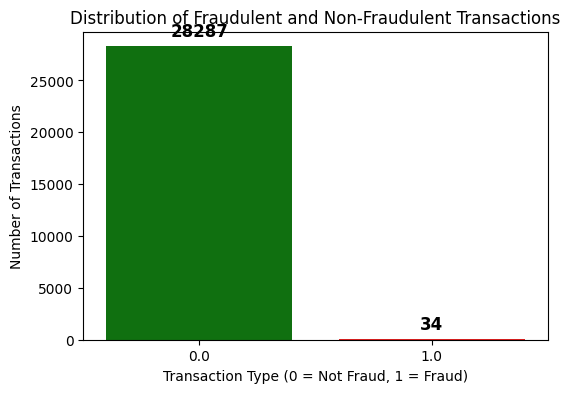

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of fraud and non-fraud transactions
fraud_counts = df['isFraud'].value_counts()

# Plot histogram
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["green", "red"])

# Add labels
plt.xlabel("Transaction Type (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Fraudulent and Non-Fraudulent Transactions")

# Display count values on top of bars
for i, count in enumerate(fraud_counts.values):
    plt.text(i, count + 1000, str(count), ha='center', fontsize=12, fontweight='bold')

plt.show()


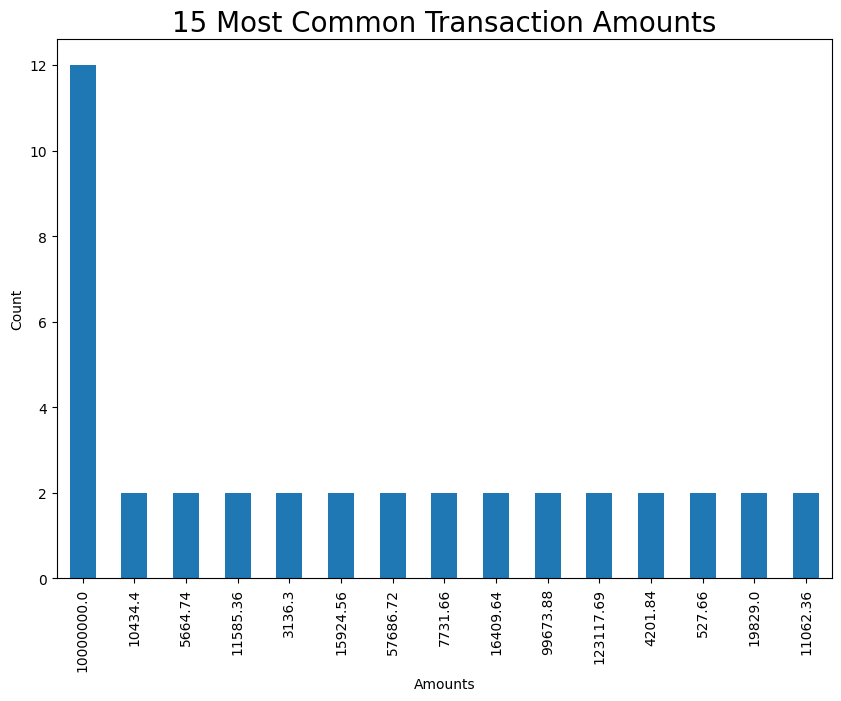

In [ ]:
import matplotlib.ticker as mticker

plt.rcParams['figure.figsize'] = (10, 7)

df['amount'].value_counts().head(15).plot.bar()

plt.title('15 Most Common Transaction Amounts', fontsize=20)
plt.xlabel('Amounts')
plt.ylabel('Count')

# Format y-axis labels to show full numbers
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


<ipython-input-165-5e39c48304ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette="viridis")


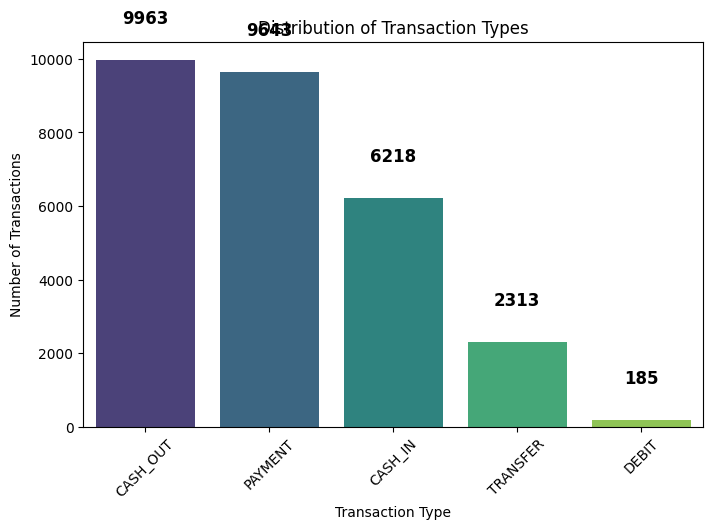

In [ ]:
# Count the number of transactions for each type
transaction_counts = df['type'].value_counts()

# Plot histogram
plt.figure(figsize=(8,5))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette="viridis")

# Add labels
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Transaction Types")

# Display count values on top of bars
for i, count in enumerate(transaction_counts.values):
    plt.text(i, count + 1000, str(count), ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


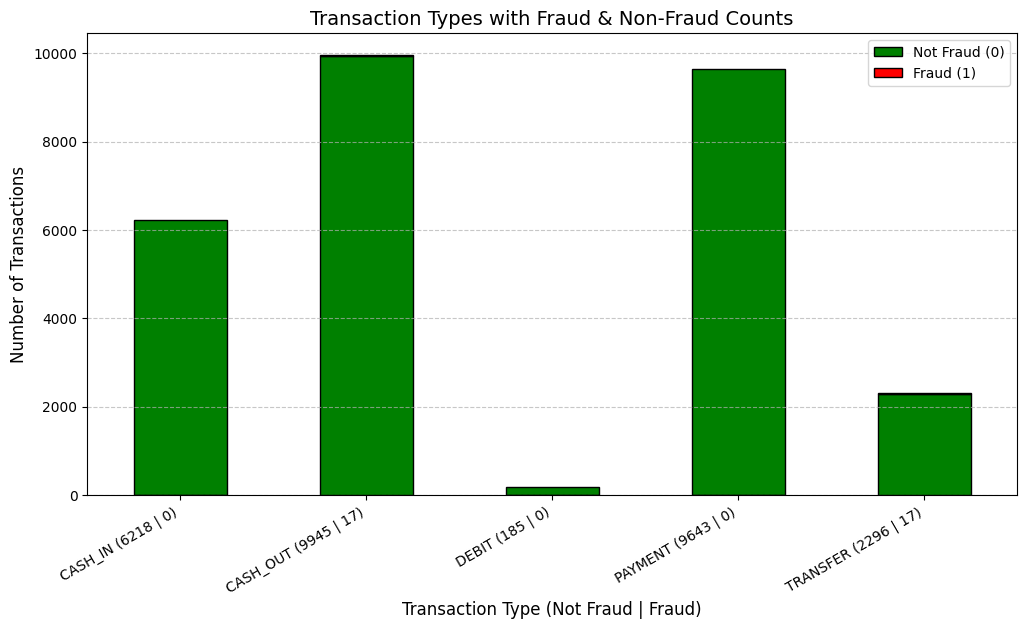

In [ ]:
import matplotlib.pyplot as plt

# Count fraud and non-fraud transactions for each transaction type
transaction_fraud_counts = df.groupby("type")["isFraud"].value_counts().unstack().fillna(0)

# Define colors
colors = ["green", "red"]

# Create a new x-axis label with fraud & non-fraud counts
labels = [f"{t} ({int(nf)} | {int(f)})" for t, (nf, f) in zip(transaction_fraud_counts.index,
                                                               zip(transaction_fraud_counts[0], transaction_fraud_counts[1]))]

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
transaction_fraud_counts.plot(kind="bar", stacked=True, color=colors, edgecolor="black", ax=ax)

# Set labels
ax.set_xlabel("Transaction Type (Not Fraud | Fraud)", fontsize=12)
ax.set_ylabel("Number of Transactions", fontsize=12)
ax.set_title("Transaction Types with Fraud & Non-Fraud Counts", fontsize=14)
ax.legend(["Not Fraud (0)", "Fraud (1)"])

# Replace x-axis labels with new formatted labels
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=30, ha="right", fontsize=10)  # Rotate for better readability

ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


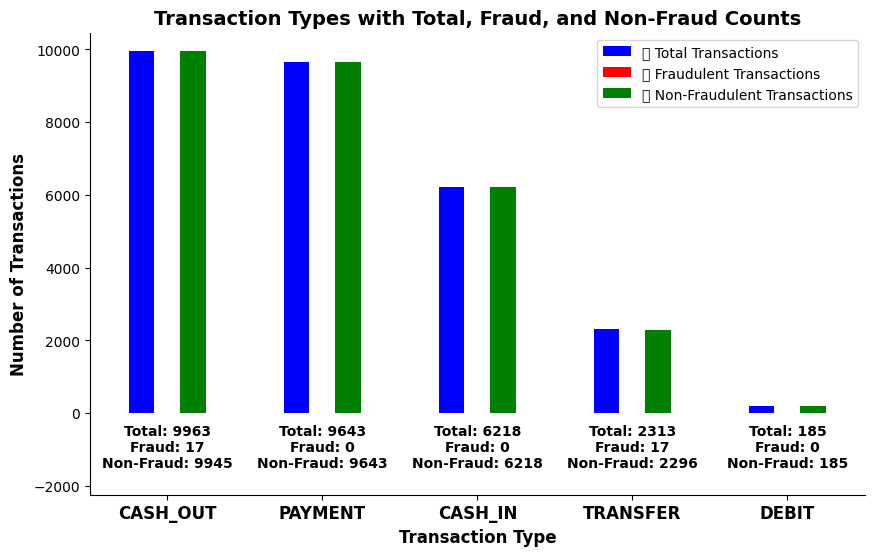

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count total transactions, fraud, and non-fraud for each transaction type
total_counts = df['type'].value_counts()
fraud_counts = df[df['isFraud'] == 1]['type'].value_counts()
non_fraud_counts = df[df['isFraud'] == 0]['type'].value_counts()

# Ensure all transaction types are included, even if fraud or non-fraud is missing
transaction_summary = pd.DataFrame({
    "Total Transactions": total_counts,
    "Fraudulent Transactions": fraud_counts.reindex(total_counts.index, fill_value=0),
    "Non-Fraudulent Transactions": non_fraud_counts.reindex(total_counts.index, fill_value=0)
})

# Define colors for each category
colors = ["blue", "red", "green"]

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
transaction_summary.plot(kind="bar", color=colors, ax=ax)

# Ensure axes are visible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Labels and title
plt.xlabel("Transaction Type", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')
plt.title("Transaction Types with Total, Fraud, and Non-Fraud Counts", fontsize=14, fontweight='bold')

# Custom legend inside the graph
plt.legend([
    "🔵 Total Transactions",
    "🔴 Fraudulent Transactions",
    "🟢 Non-Fraudulent Transactions"
], loc="upper right")

# Add count labels below each transaction type (spaced properly)
x_labels = transaction_summary.index.tolist()
count_labels = [
    f"Total: {int(total)}\nFraud: {int(fraud)}\nNon-Fraud: {int(non_fraud)}"
    for total, fraud, non_fraud in zip(transaction_summary["Total Transactions"],
                                       transaction_summary["Fraudulent Transactions"],
                                       transaction_summary["Non-Fraudulent Transactions"])
]

# Adjust x-axis labels for better spacing
plt.xticks(range(len(x_labels)), x_labels, rotation=0, fontsize=12, fontweight='bold')

# Add count labels below the bars with extra spacing
offset = max(total_counts) * 0.15  # Adjust this to move text further down
for i, count_text in enumerate(count_labels):
    plt.text(i, -offset, count_text, ha='center', fontsize=10, fontweight='bold', color='black')

# Extend y-axis limits to create more space at the bottom
plt.ylim(bottom=-offset * 1.5)

plt.show()


In [ ]:
print('The Types of fraudulent transactions are {}'.format(list(df.loc[df['isFraud'] == 1, 'type'].drop_duplicates().values)) )


The Types of fraudulent transactions are ['CASH_OUT', 'TRANSFER']


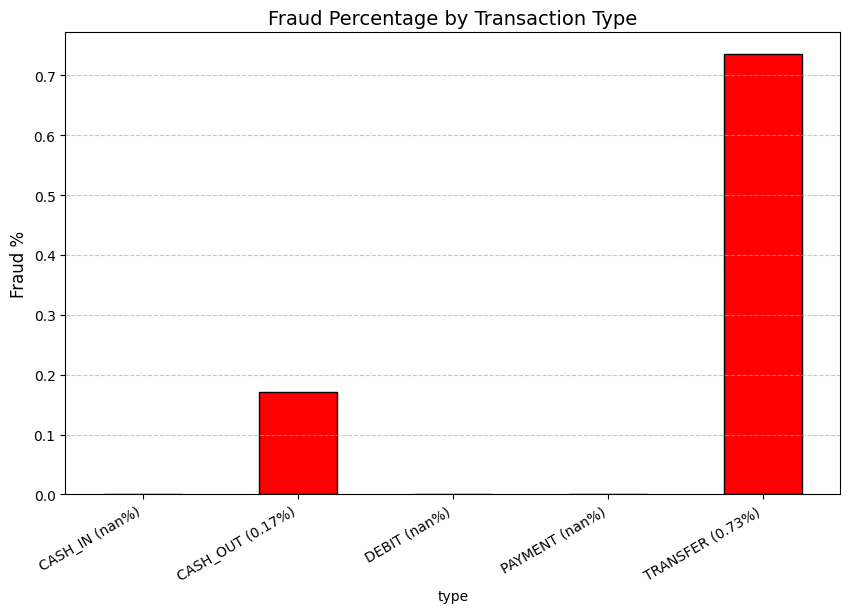

In [ ]:
import matplotlib.pyplot as plt

# Calculate fraud percentage for each transaction type
fraud_percentage = df[df["isFraud"] == 1]["type"].value_counts() / df["type"].value_counts() * 100

# Convert values to strings with percentages
labels = [f"{t} ({p:.2f}%)" for t, p in zip(fraud_percentage.index, fraud_percentage.values)]

# Plot the fraud percentage by transaction type
plt.figure(figsize=(10, 6))
fraud_percentage.plot(kind='bar', color='red', edgecolor="black")

# Add labels
plt.title("Fraud Percentage by Transaction Type", fontsize=14)
plt.ylabel("Fraud %", fontsize=12)
plt.xticks(range(len(labels)), labels, rotation=30, ha="right", fontsize=10)  # Format x-axis labels with percentages

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.show()


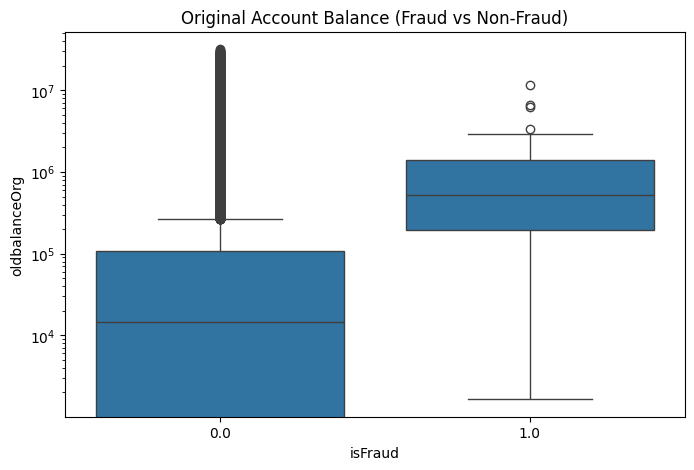

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="isFraud", y="oldbalanceOrg", data=df)
plt.yscale('log')  # If needed for better visualization
plt.title("Original Account Balance (Fraud vs Non-Fraud)")
plt.show()


In [ ]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)


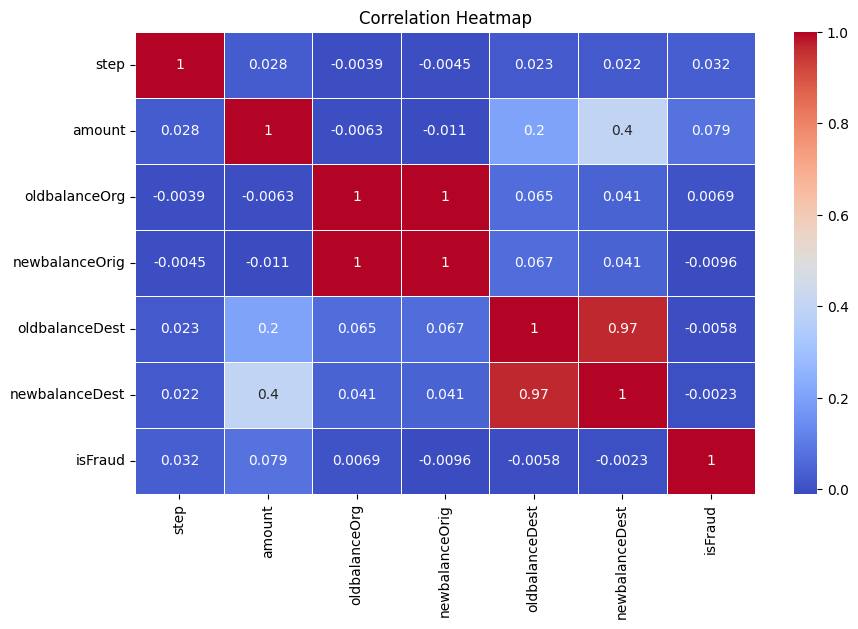

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert categorical columns to numerical values (if needed)
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df.drop('step', axis=1, inplace=True)


In [ ]:
# Drop destination balance columns due to low correlation with fraud
df.drop(['oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud'], dtype='object')

In [ ]:
# Filter fraudulent transactions
fraud_transactions = df[df['isFraud'] == 1]

# Separate fraud transactions into TRANSFER and CASH_OUT
fraud_transfer = fraud_transactions[fraud_transactions['type'] == 'TRANSFER']
fraud_cash_out = fraud_transactions[fraud_transactions['type'] == 'CASH_OUT']

# Display results
print(f"Total Fraudulent TRANSFER Transactions: {len(fraud_transfer)}")
print(f"Total Fraudulent CASH_OUT Transactions: {len(fraud_cash_out)}")


Total Fraudulent TRANSFER Transactions: 17
Total Fraudulent CASH_OUT Transactions: 17


In [ ]:
# Step 1: Keep only 'TRANSFER' and 'CASH_OUT' transactions
df_filtered = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])].copy()

# Step 2: Encode 'type': TRANSFER → 0, CASH_OUT → 1
df_filtered['type'] = df_filtered['type'].map({'TRANSFER': 0, 'CASH_OUT': 1})

# Step 3: Confirm encodings
print("✅ Unique values in 'type':", df_filtered['type'].unique())
print("✅ Unique values in 'isFraud':", df_filtered['isFraud'].unique())


✅ Unique values in 'type': [1 0]
✅ Unique values in 'isFraud': [ 0.  1. nan]


In [ ]:
# Step: Use only selected columns
df_model = df_filtered[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']]

# Drop rows where 'isFraud' is NaN
df_model = df_model.dropna(subset=['isFraud'])

# Step: Features and target
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Step: Scale only amount-related columns
scaler = StandardScaler()
cols_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

# ✅ Use SMOTE-resampled data for scaling
X_train_scaled = X_train_resampled.copy()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_scaled[cols_to_scale])

# ✅ Scale test set using the same scaler
X_test_scaled = X_test.copy()
X_test_scaled[cols_to_scale] = scaler.transform(X_test_scaled[cols_to_scale])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate
for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)

    # Evaluation
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("🧾 Classification Report:\n", classification_report(y_test, y_pred))



🔍 Model: Logistic Regression
✅ Accuracy: 0.945010183299389
📊 Confusion Matrix:
 [[2314  134]
 [   1    6]]
🧾 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      2448
         1.0       0.04      0.86      0.08         7

    accuracy                           0.95      2455
   macro avg       0.52      0.90      0.53      2455
weighted avg       1.00      0.95      0.97      2455


🔍 Model: Decision Tree
✅ Accuracy: 0.9995926680244399
📊 Confusion Matrix:
 [[2447    1]
 [   0    7]]
🧾 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2448
         1.0       0.88      1.00      0.93         7

    accuracy                           1.00      2455
   macro avg       0.94      1.00      0.97      2455
weighted avg       1.00      1.00      1.00      2455


🔍 Model: Random Forest
✅ Accuracy: 0.9995926680244399
📊 Confusion Matrix:
 [[2447 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Step: Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

# Step: Evaluate
y_pred = rf_model.predict(X_test_scaled)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🧾 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9995926680244399
📊 Confusion Matrix:
 [[2447    1]
 [   0    7]]
🧾 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2448
         1.0       0.88      1.00      0.93         7

    accuracy                           1.00      2455
   macro avg       0.94      1.00      0.97      2455
weighted avg       1.00      1.00      1.00      2455



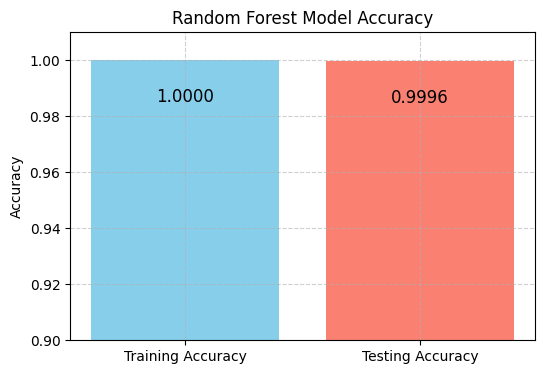

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

# Predictions
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Accuracy scores
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Plotting
plt.figure(figsize=(6, 4))
bars = plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_acc, test_acc], color=['skyblue', 'salmon'])
plt.ylim(0.9, 1.01)
plt.title('Random Forest Model Accuracy')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate bars with values below
for bar, acc in zip(bars, [train_acc, test_acc]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01,
             f"{acc:.4f}", ha='center', va='top', fontsize=12, color='black')

plt.show()


In [ ]:
def predict_transaction_rf():
    print("🔍 Enter the transaction details below:\n")
    type_input = int(input("Enter type (TRANSFER=0, CASH_OUT=1): "))
    amount = float(input("Enter transaction amount: "))
    old_bal = float(input("Enter old balance of origin account: "))
    new_bal = float(input("Enter new balance of origin account: "))

    # Prepare DataFrame
    input_df = pd.DataFrame([{
        'type': type_input,
        'amount': amount,
        'oldbalanceOrg': old_bal,
        'newbalanceOrig': new_bal
    }])

    # Scale numeric columns only
    input_df[cols_to_scale] = scaler.transform(input_df[cols_to_scale])

    # Predict
    prediction = rf_model.predict(input_df)[0]
    print("\n🎯 Prediction:", "Fraudulent Transaction ❌" if prediction == 1 else "Legit Transaction ✅")


In [ ]:
predict_transaction_rf()


🔍 Enter the transaction details below:

Enter type (TRANSFER=0, CASH_OUT=1): 1
Enter transaction amount: 900
Enter old balance of origin account: 900
Enter new balance of origin account: 0

🎯 Prediction: Fraudulent Transaction ❌
